<a href="https://colab.research.google.com/github/Zoeph123/python--analysis/blob/main/my_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()


Saving olympic_sports.csv to olympic_sports (1).csv


In [17]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [53]:
# Save a copy of the raw data
df.to_csv("raw_sports_data.csv", index=False)
print("Raw data saved as raw_sports_data.csv")
files.download("raw_sports_data.csv")

Raw data saved as raw_sports_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
df_clean = df
columns_to_keep = ['Sport', 'Sex', 'NOC']

# 3. Remove rows where any key column is missing or empty
for col in columns_to_keep:
    df_clean = df_clean[df_clean[col].notna()]        # remove NaN
    df_clean = df_clean[df_clean[col].str.strip() != ""]  # remove empty strings

# 4. Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# 5. Strip leading/trailing spaces from column names and values
df_clean.columns = df_clean.columns.str.strip()
for col in df_clean.columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# 6. Optional: standardize text
df_clean["Sport"] = df_clean["Sport"].str.title()      # Capitalize first letter
df_clean["NOC"] = df_clean["NOC"].str.upper()  # Uppercase NOC codes
df_clean["Sex"] = df_clean["Sex"].str.upper()          # Uppercase M/F

# 7. Preview cleaned data
df_clean.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


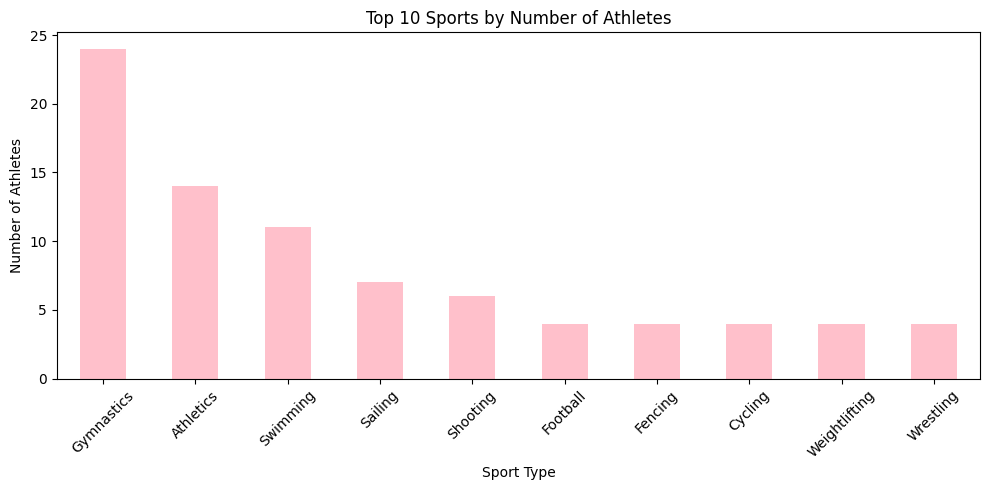

In [47]:
df_clean = df
# Count athletes per sport
sport_counts = df_clean["Sport"].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sport_counts.plot(kind="bar", color="pink")
plt.title("Top 10 Sports by Number of Athletes")
plt.xlabel("Sport Type")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

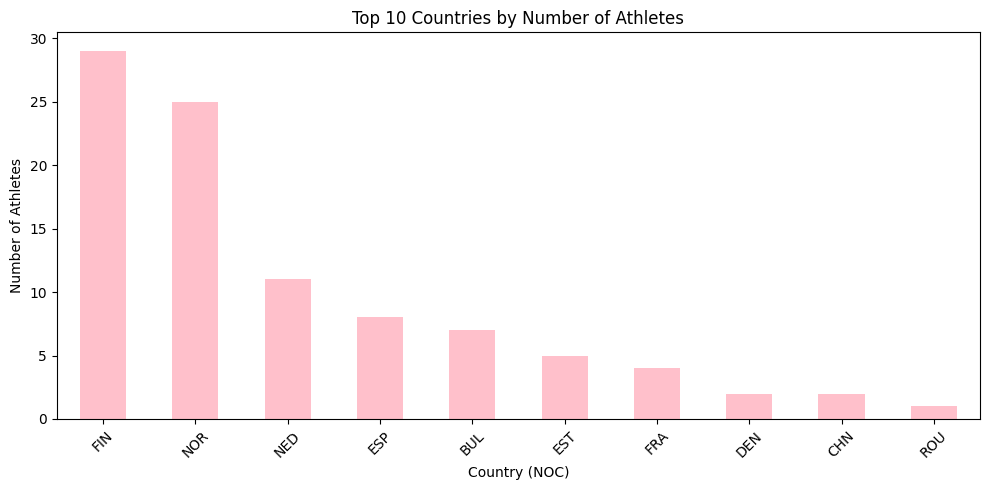

In [48]:
df_nationality = df
country_counts = df_nationality["NOC"].value_counts().head(10)

plt.figure(figsize=(10,5))
country_counts.plot(kind="bar", color="pink")
plt.title("Top 10 Countries by Number of Athletes")
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

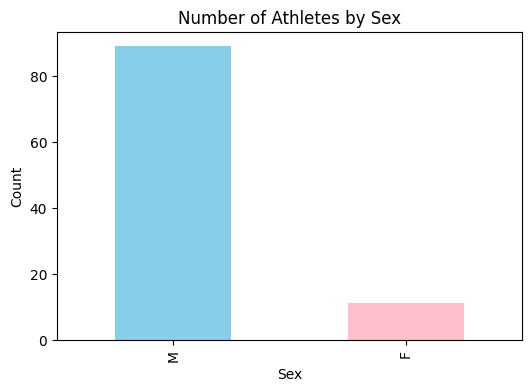

In [49]:
df_sex = df
sex_counts = df_sex["Sex"].value_counts()

plt.figure(figsize=(6,4))
sex_counts.plot(kind="bar", color=["skyblue", "pink"])
plt.title("Number of Athletes by Sex")
plt.ylabel("Count")
plt.show()
